In [1]:
data=read.table("AvTempAtlanta.txt",header=T)
head(data)
names(data)

Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Annual
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1879,44.3,43.7,57.6,58.9,69.8,74.9,79.6,73.9,68.7,64.3,53.9,51.5,61.8
1880,54.3,51.4,55.5,63.4,71.0,76.5,79.2,76.8,69.4,60.8,47.2,42.1,62.3
1881,40.1,46.6,49.1,59.1,70.8,77.8,81.1,78.8,75.5,67.2,52.6,49.6,62.4
1882,48.8,52.4,57.4,64.8,66.1,76.6,75.9,75.8,71.7,65.8,51.1,41.4,62.3
1883,43.0,50.2,50.2,61.6,67.4,76.4,80.1,76.2,71.3,66.0,53.7,48.0,62.0
1884,35.9,51.7,54.4,58.4,70.7,71.1,77.7,75.3,74.9,68.1,51.3,44.5,61.2


[1] "Year"   "Jan"    "Feb"    "Mar"    "Apr"    "May"    "Jun"    "Jul"   
 [9] "Aug"    "Sep"    "Oct"    "Nov"    "Dec"    "Annual"

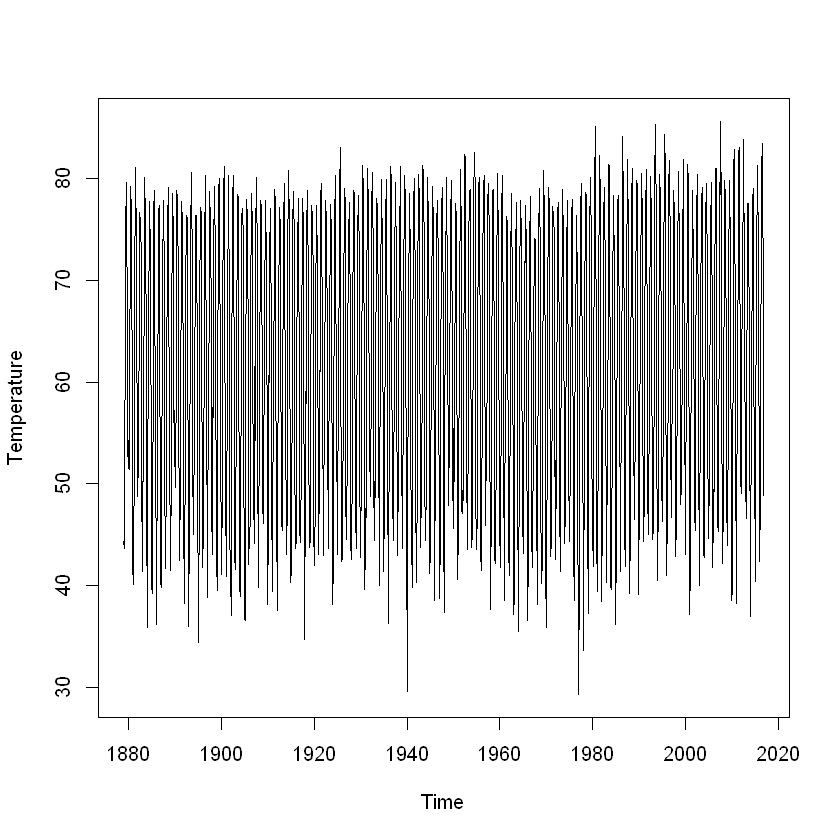

In [2]:
temp=as.vector(t(data[,-c(1,14)]))
temp=ts(temp,start = 1879,frequency = 12)
#?ts #time series objects
ts.plot(temp,ylab="Temperature")

# pre-define time points

In [4]:
##create eaually spaced time points for fitting trends
time.pts=c(1:length(temp))
time.pts=c(time.pts-min(time.pts))/max(time.pts)

# 1. Moving average
with built- in model `ksmooth`

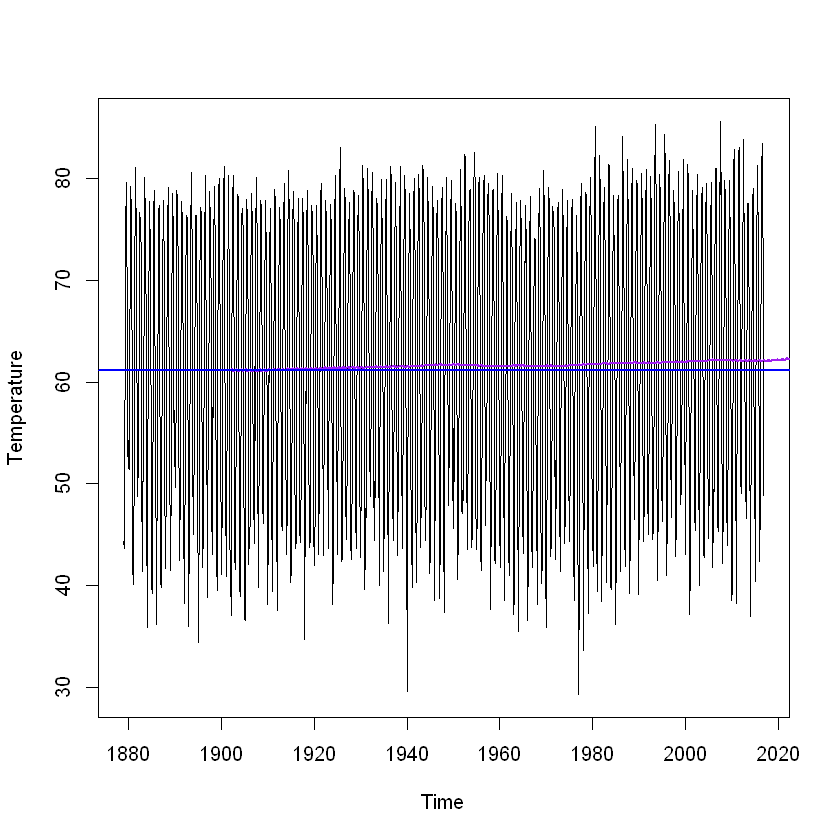

In [5]:
##fit a moving average
mav.fit=ksmooth(time.pts,temp,kernel = "box")
temp.fit.mav=ts(mav.fit$y,start=1902,frequency = 12)
## is there a trend?
ts.plot(temp,ylab="Temperature")
lines(temp.fit.mav,lwd=2,col="purple")
abline(temp.fit.mav[1],0,lwd=2,col="blue")
#?abline

# 2. Parametric regression
quadratic polynomial with `lm` function


Call:
lm(formula = temp ~ x1 + x2)

Residuals:
    Min      1Q  Median      3Q     Max 
-32.770 -11.886   0.514  13.418  22.942 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  61.4247     0.9841  62.420   <2e-16 ***
x1           -1.5723     4.5481  -0.346    0.730    
x2            3.4937     4.4062   0.793    0.428    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 13.36 on 1653 degrees of freedom
Multiple R-squared:  0.002098,	Adjusted R-squared:  0.0008903 
F-statistic: 1.737 on 2 and 1653 DF,  p-value: 0.1763


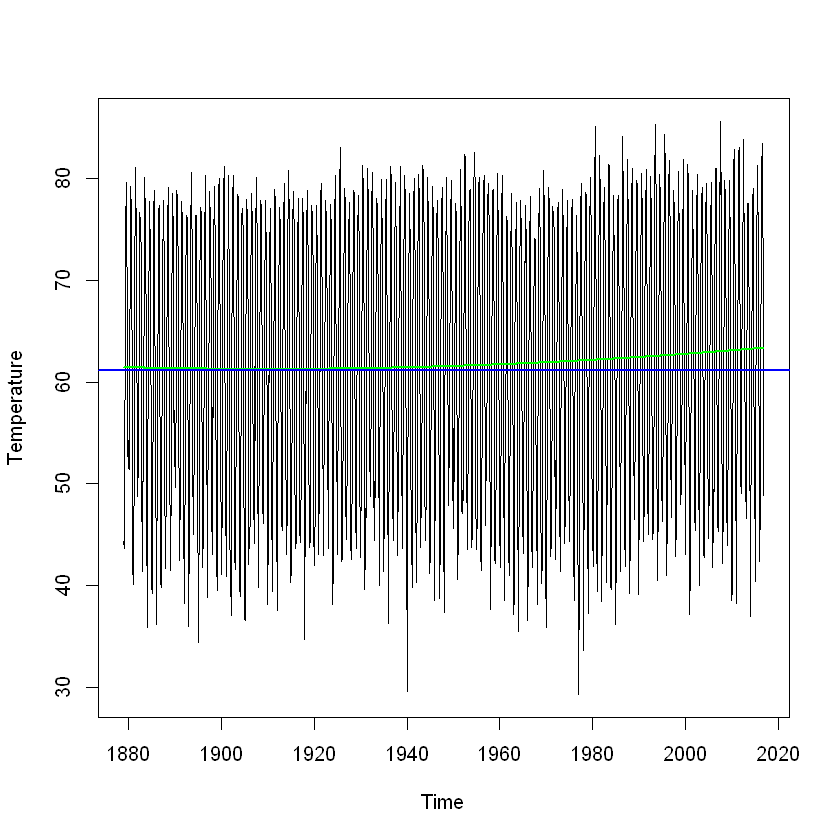

In [6]:
##fit a parametric quadratic polynomial
x1=time.pts
x2=time.pts^2
lm.fit=lm(temp~x1+x2)
summary(lm.fit)

## is there a trend?
temp.fit.lm=ts(fitted(lm.fit),start=1879,frequency = 12)
ts.plot(temp,ylab="Temperature")
lines(temp.fit.lm,lwd=2,col="green")
abline(temp.fit.mav[1],0,lwd=2,col="blue")

# 3. Local Polynomial trend estimation, and Splines trend estimation
with `loess` function for local polynomial trend estimation, and `gam` function in `mgcv` library for splines trend estimation

Warning message:
"package 'mgcv' was built under R version 3.6.1"Loading required package: nlme
Warning message:
"package 'nlme' was built under R version 3.6.1"This is mgcv 1.8-28. For overview type 'help("mgcv-package")'.


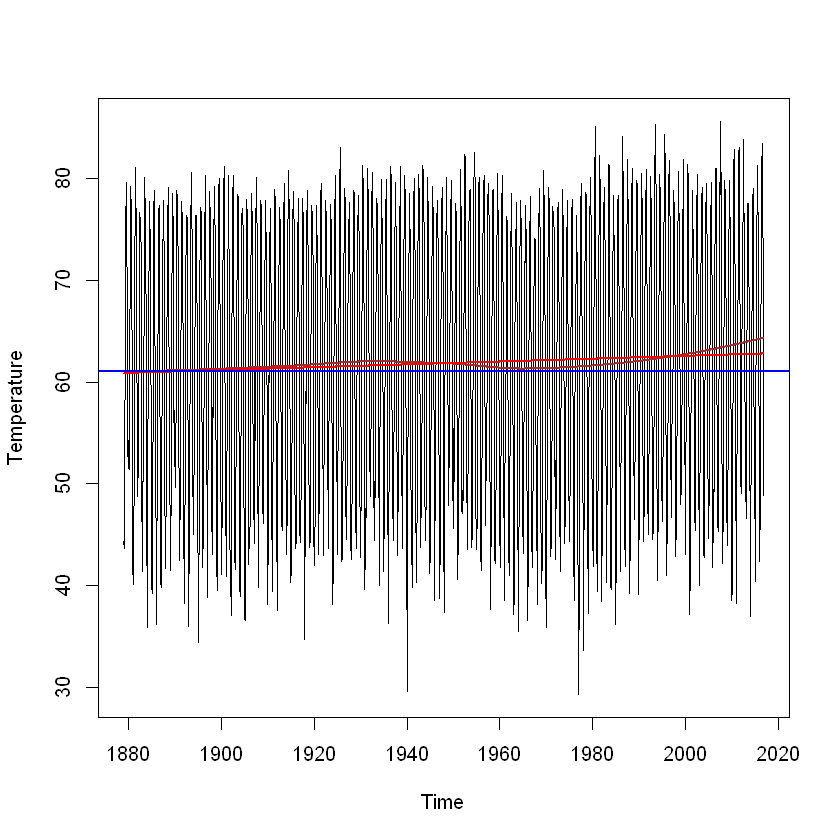

In [7]:
##Local Polynomial trend estimation
loc.fit=loess(temp~time.pts)
temp.fit.loc=ts(fitted(loc.fit),start=1879,frequency = 12)

#Splines trend estimation
library(mgcv)
gam.fit=gam(temp~s(time.pts))
temp.fit.gam=ts(fitted(gam.fit),start=1879,frequency = 12)

ts.plot(temp,ylab="Temperature")
lines(temp.fit.loc,lwd=2,col="brown")
lines(temp.fit.gam,lwd=2,col="red")
abline(temp.fit.loc[1],0,lwd=2,col="blue")

# 4. Simply compare all 4 different trend estimation

Warning message in xy.coords(x = matrix(rep.int(tx, k), ncol = k), y = x, log = log, :
"NAs introduced by coercion"Warning message in xy.coords(x, y):
"NAs introduced by coercion"

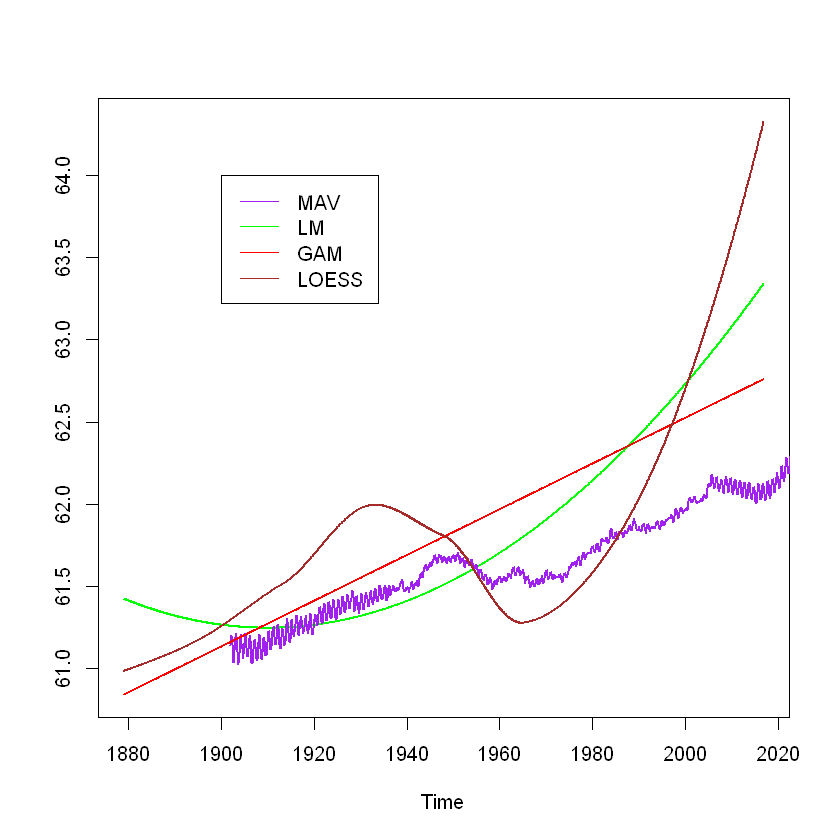

In [8]:
#compare all estimated trends
all.val=c(temp.fit.mav,temp.fit.lm,temp.fit.gam,temp.fit.loc)
ylim=c(min(all.val),max(all.val))
ts.plot(temp.fit.lm,lwd=2,col="green",ylim=ylim,ylan="Temperature")
lines(temp.fit.mav,lwd=2,col="purple")
lines(temp.fit.gam,lwd=2,col="red")
lines(temp.fit.loc,lwd=2,col="brown")
legend(x=1900,y=64,legend = c("MAV","LM","GAM","LOESS"),lty=1,col=c("purple","green","red","brown"))


Here only the trend is ploted, we provided the scale for the first 2 command lines in order to let all the trends plotted on the same scale.

* Moving average trend is quite each slightly caturing some of the seasonality 
* LM (parametric fitting model) is slightly quadratic but MAV and LM both capture a similar increase over time
* Loess (local polynomial regression) is more complex with some smooth ups and down.

However all of the estimated approached shows an increase temperature (around 2 degrees) over time.